In [8]:
import json
import os

import data_loaders
import model_training

from hamilton import base, driver
from hamilton.io.materialization import to
import pandas as pd

import custom_materializers

In [9]:
dag_config = {
    "test_size_fraction": 0.5,
    "shuffle_train_test_split": True,
    "data_loader" : "iris",
    "clf" : "logistic",
    "penalty" : "l2"
}
dr = (
        driver.Builder()
        .with_adapter(base.DefaultAdapter())
        .with_config(dag_config)
        .with_modules(data_loaders, model_training)
        .build()
    )

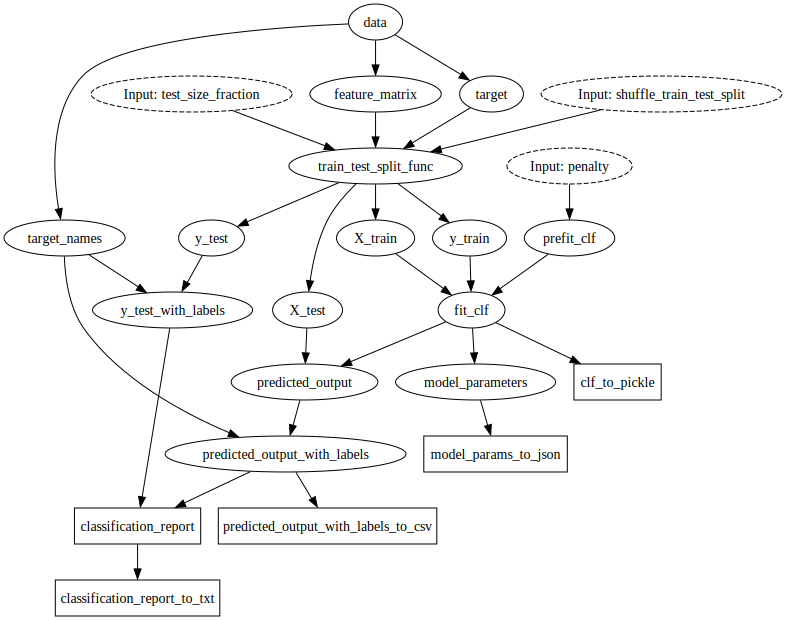

In [10]:
materializers = [
        to.json(
            dependencies=["model_parameters"],
            id="model_params_to_json",
            path="./data/params.json"
        ),
        # classification report to .txt file
        to.file(
            dependencies=["classification_report"],
            id="classification_report_to_txt",
            path="./data/classification_report.txt",
        ),
        # materialize the model to a pickle file
        to.pickle(
            dependencies=["fit_clf"], id="clf_to_pickle", path="./data/clf.pkl"
        ),
        # materialize the predictions we made to a csv file
        to.csv(
            dependencies=["predicted_output_with_labels"],
            id="predicted_output_with_labels_to_csv",
            path="./data/predicted_output_with_labels.csv",
        ),
    ]

dr.visualize_materialization(
    *materializers,
    additional_vars=["classification_report"],
    output_file_path=None,
    render_kwargs={},
)

In [11]:
materialization_results, additional_vars = dr.materialize(
        # materialize model parameters to json
        *materializers,
        additional_vars=["classification_report"],
)

/Users/elijahbenizzy/.pyenv/versions/3.9.10/envs/hamilton/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
print(additional_vars['classification_report'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       0.91      0.93      0.92        85
           2       0.97      0.99      0.98        96
           3       0.99      0.97      0.98        93
           4       0.99      0.92      0.95        88
           5       0.95      0.95      0.95        85
           6       0.99      0.97      0.98        97
           7       0.97      0.97      0.97        89
           8       0.88      0.88      0.88        82
           9       0.91      0.97      0.94        90

    accuracy                           0.96       899
   macro avg       0.95      0.95      0.95       899
weighted avg       0.96      0.96      0.96       899



In [14]:
print(open((materialization_results['classification_report_to_txt']['path'])).read())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       0.91      0.93      0.92        85
           2       0.97      0.99      0.98        96
           3       0.99      0.97      0.98        93
           4       0.99      0.92      0.95        88
           5       0.95      0.95      0.95        85
           6       0.99      0.97      0.98        97
           7       0.97      0.97      0.97        89
           8       0.88      0.88      0.88        82
           9       0.91      0.97      0.94        90

    accuracy                           0.96       899
   macro avg       0.95      0.95      0.95       899
weighted avg       0.96      0.96      0.96       899

